# Neural & Behavioral Modeling - Week 17 (Exercises)
by 駱皓正(austenpsy@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import *
import numpy as np
from scipy import signal
import random as rd

## 1 Spike Timing Varability

Here we explore whehter an I-F neuron with some stochasticity can generate Poisson-like spikes, whoses inter-spike intervals (ISIs) can be modelled by an exponential distribution featuring Cv=1 (see P.8 for an example).

Three kinds of noise can be SYSTEMATICALLY added to the I-F process: (1) a stochastic firing threshold; (2) a stochastic voltage baseline; (3) a stochastic excitation during integration.

### 1.0 The Leaky Integrate-and-Fire Model (5 points)

0.0


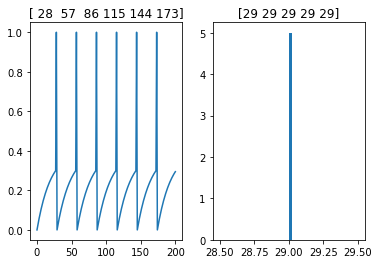

In [2]:
I=2;g=5;C=10;Vrst=0;Vthr=.3;Vspk=1;

dt=.1; V=np.array([Vrst]);
for t in np.arange(0,20,dt):
    V1=V[-1] # the last element
    s=V1>Vthr; # An implicit IF-THEN hack
    V2=s*Vrst+(1-s)*(V1+dt/C*(-g*V1+I)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.append(V,V2)

spike_timings=np.where(V==Vspk)[0]
subplot(1,2,1); plot(V);
title(spike_timings);

ISIs=np.diff(spike_timings);
cv=np.std(ISIs)/np.mean(ISIs)
print(cv)
subplot(1,2,2);hist(ISIs,bins=50); title(ISIs);

### 1.1 Your modified I-F model

#### Stochastic Firing Threshold

0.409120510164


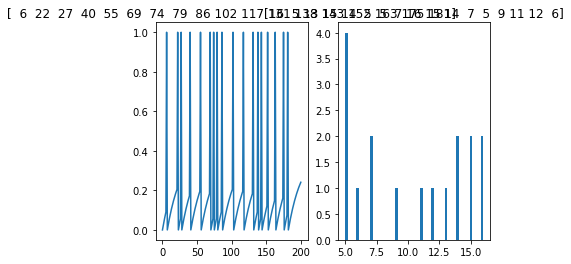

In [19]:
I=2;g=5;C=10;Vrst=0;Vthr=.3;Vspk=1;

dt=.1; V=np.array([Vrst]);
for t in np.arange(0,20,dt):
    V1=V[-1] # the last element
    Vthr = rd.random()
    s=V1>Vthr; # An implicit IF-THEN hack
    V2=s*Vrst+(1-s)*(V1+dt/C*(-g*V1+I)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.append(V,V2)

spike_timings=np.where(V==Vspk)[0]
subplot(1,2,1); plot(V);
title(spike_timings);

ISIs=np.diff(spike_timings);
cv=np.std(ISIs)/np.mean(ISIs)
print(cv)
subplot(1,2,2);hist(ISIs,bins=50); title(ISIs);

#### Stochastic Voltage Baseline

1.32244950832


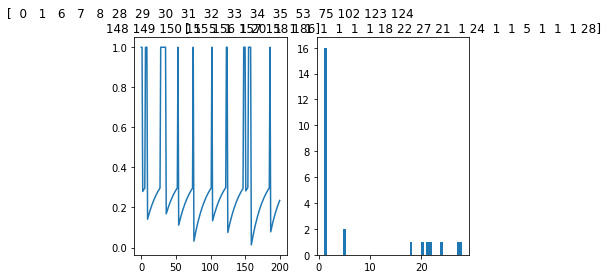

In [22]:
I=2;g=5;C=10;Vrst=rd.random();Vthr=.3;Vspk=1;

dt=.1; V=np.array([Vrst]);
for t in np.arange(0,20,dt):
    V1=V[-1] # the last element
    s=V1>Vthr; # An implicit IF-THEN hack
    V2=s*rd.random()+(1-s)*(V1+dt/C*(-g*V1+I)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.append(V,V2)

spike_timings=np.where(V==Vspk)[0]
subplot(1,2,1); plot(V);
title(spike_timings);

ISIs=np.diff(spike_timings);
cv=np.std(ISIs)/np.mean(ISIs)
print(cv)
subplot(1,2,2);hist(ISIs,bins=50); title(ISIs);

#### Stochastic Excitation During Integration.

1.31277258253


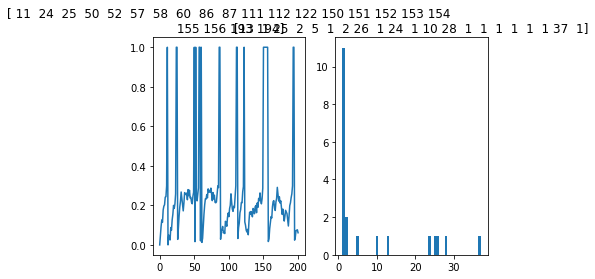

In [36]:
I=2;g=5;C=10;Vrst=0;Vthr=.3;Vspk=1;

def sedi(a,c,b,t,d,e,f):
    X = a*c+(1-a)*(b+t/d*(-e*b+f))+rd.uniform(-0.05,0.05)
    while(X<0):
        X = a*c+(1-a)*(b+t/d*(-e*b+f))+rd.uniform(-1,1)
    return X

dt=.1; V=np.array([Vrst]);
for t in np.arange(0,20,dt):
    V1=V[-1] # the last element
    s=V1>Vthr; # An implicit IF-THEN hack
    V2=sedi(s,Vrst,V1,dt,C,g,I)
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.append(V,V2)

spike_timings=np.where(V==Vspk)[0]
subplot(1,2,1); plot(V);
title(spike_timings);

ISIs=np.diff(spike_timings);
cv=np.std(ISIs)/np.mean(ISIs)
print(cv)
subplot(1,2,2);hist(ISIs,bins=50); title(ISIs);

#### 3 Stochastic Processes Are Performed

0.7145772


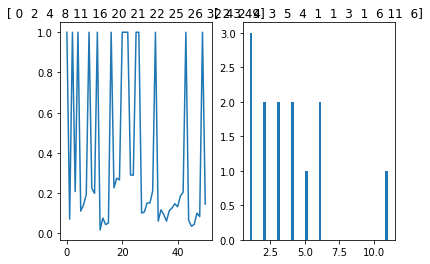

In [46]:
I=2;g=5;C=10;Vrst=rd.uniform(0,0.3);Vthr=.3;Vspk=1;

def sedi(a,c,b,t,d,e,f):
    X = a*c+(1-a)*(b+t/d*(-e*b+f))+rd.uniform(-0.05,0.05)
    while(X<0):
        X = a*c+(1-a)*(b+t/d*(-e*b+f))+rd.uniform(-1,1)
    return X

dt=.1; V=np.array([Vrst]);
for t in np.arange(0,5,dt):
    V1=V[-1] # the last element
    Vthr = rd.uniform(0,0.5)
    s=V1>Vthr; # An implicit IF-THEN hack
    V2=sedi(s,rd.uniform(0,0.3),V1,dt,C,g,I)
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.append(V,V2)

spike_timings=np.where(V==Vspk)[0]
subplot(1,2,1); plot(V);
title(spike_timings);

ISIs=np.diff(spike_timings);
cv=np.std(ISIs)/np.mean(ISIs)
print(cv)
subplot(1,2,2);hist(ISIs,bins=50); title(ISIs);

#### Discussion


An I-F neuron with all stochasticity can generate Poisson-like spikes. But neurons whoses inter-spike intervals (ISIs) can be modelled by an exponential distribution featuring Cv>0. 

## 2  Mechanisms of neuronal synchrony (5 points)

Here we try to examine what factors are responsible for neuronal synchrony.

Specifically please try to SYSTEMATICALLY change simulation parameters or model parameters to break the alpha rhythm (~10Hz) among 1,000 Izhikevich neurons.

Note that the simulation results will vary unless you fix a random seed.

### 2.0 An ensemble of Izhikevich neurons

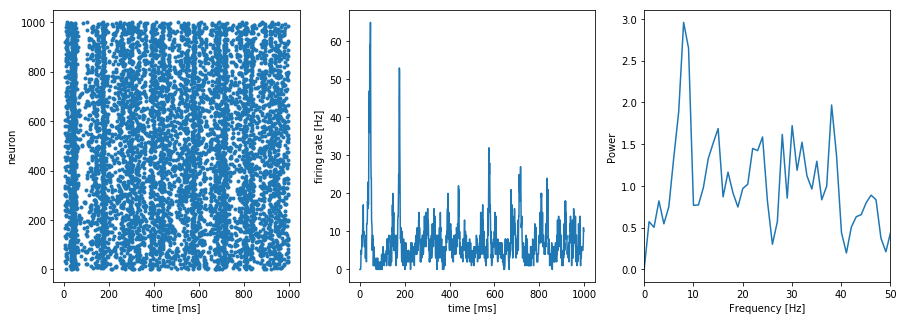

In [100]:
# Excitatory neurons                      Inhibitory neurons
Ne=800;                                   Ni=200;
re=np.random.rand(Ne);                    ri=np.random.rand(Ni); 
a=np.append(0.02*np.ones(Ne),             0.02+0.08*ri);
b=np.append(0.2*np.ones(Ne),              0.25-0.05*ri);
c=np.append(-65+15*re**2,                 -65*np.ones(Ni));
d=np.append(8-6*re**2,                    2*np.ones(Ni));
S=np.hstack([0.5*np.random.rand(Ne+Ni,Ne),-np.random.rand(Ne+Ni,Ni)]); # synaptic connection 

v=-65*np.ones(Ne+Ni)      # Initial values of v
u=b*v                     # Initial values of u
firings=np.array([])      # spike timings: [t, neuron that fire at t]

for t in range(1000):     # simulation of 1000 ms 
    I=np.append(5*np.random.randn(Ne),2*np.random.randn(Ni)) # thalamic input 
    fired=np.where(v>=30)[0] # indices of spikes
    if(fired.size>0):
        new_firings=np.hstack([np.repeat([[t]],fired.size,axis=0),np.array([fired]).T])
        firings=np.vstack([firings,new_firings]) if(firings.size>0) else new_firings
        v[fired]=c[fired]  
        u[fired]=u[fired]+d[fired]
        I=I+np.sum(S[:,fired],1)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    u=u+a*(b*v-u)   

figure(figsize=(15,5))
subplot(1,3,1); plot(firings[:,0],firings[:,1],'.');
xlabel('time [ms]'); ylabel('neuron');

rate=np.zeros(1000) # firing rate at each t
for t in range(1000):
    rate[t]=np.sum(firings[:,0]==t)

subplot(1,3,2); plot(rate); 
xlabel('time [ms]'); ylabel('firing rate [Hz]');


# Frequency analysis:
import scipy.fftpack
N=1000 # samples
Fs=1/1000 # sampling frequency (Hz)
yf=scipy.fftpack.fft(rate)
yf[0]=0; # remove the DC component
xf=np.linspace(0,1/(2*F),int(N/2))
subplot(1,3,3); plot(xf, 2/N*np.abs(yf[:int(N/2)])); 
xlabel('Frequency [Hz]'); ylabel('Power'); xlim([0,50]);

### 2.1 Your broken system

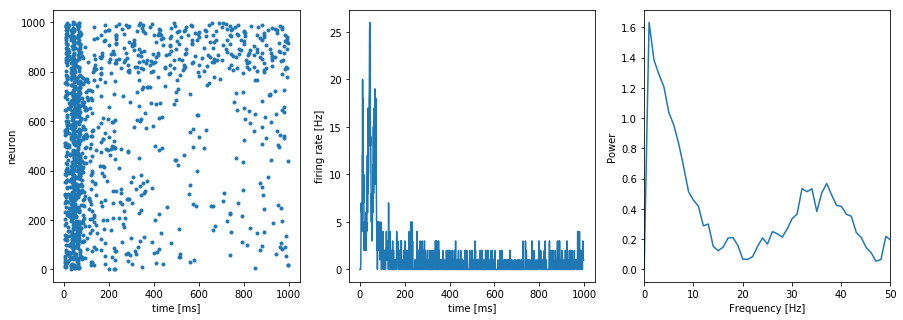

In [3]:
# consider the a factor
# Excitatory neurons                      Inhibitory neurons
Ne=800;                                   Ni=200;
re=np.random.rand(Ne);                    ri=np.random.rand(Ni); 
a=np.append(0.001*np.ones(Ne),             0.001+0.08*ri);
b=np.append(0.2*np.ones(Ne),              0.25-0.05*ri);
c=np.append(-65+15*re**2,                 -65*np.ones(Ni));
d=np.append(8-6*re**2,                    2*np.ones(Ni));
S=np.hstack([0.5*np.random.rand(Ne+Ni,Ne),-np.random.rand(Ne+Ni,Ni)]); # synaptic connection 

v=-65*np.ones(Ne+Ni)      # Initial values of v
u=b*v                     # Initial values of u
firings=np.array([])      # spike timings: [t, neuron that fire at t]

for t in range(1000):     # simulation of 1000 ms 
    I=np.append(5*np.random.randn(Ne),2*np.random.randn(Ni)) # thalamic input 
    fired=np.where(v>=30)[0] # indices of spikes
    if(fired.size>0):
        new_firings=np.hstack([np.repeat([[t]],fired.size,axis=0),np.array([fired]).T])
        firings=np.vstack([firings,new_firings]) if(firings.size>0) else new_firings
        v[fired]=c[fired]  
        u[fired]=u[fired]+d[fired]
        I=I+np.sum(S[:,fired],1)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    u=u+a*(b*v-u)   

figure(figsize=(15,5))
subplot(1,3,1); plot(firings[:,0],firings[:,1],'.');
xlabel('time [ms]'); ylabel('neuron');

rate=np.zeros(1000) # firing rate at each t
for t in range(1000):
    rate[t]=np.sum(firings[:,0]==t)

subplot(1,3,2); plot(rate); 
xlabel('time [ms]'); ylabel('firing rate [Hz]');


# Frequency analysis:
import scipy.fftpack
N=1000 # samples
Fs=1/1000 # sampling frequency (Hz)
yf=scipy.fftpack.fft(rate)
yf[0]=0; # remove the DC component
xf=np.linspace(0,1/(2*Fs),int(N/2))
subplot(1,3,3); plot(xf, 2/N*np.abs(yf[:int(N/2)])); 
xlabel('Frequency [Hz]'); ylabel('Power'); xlim([0,50]);

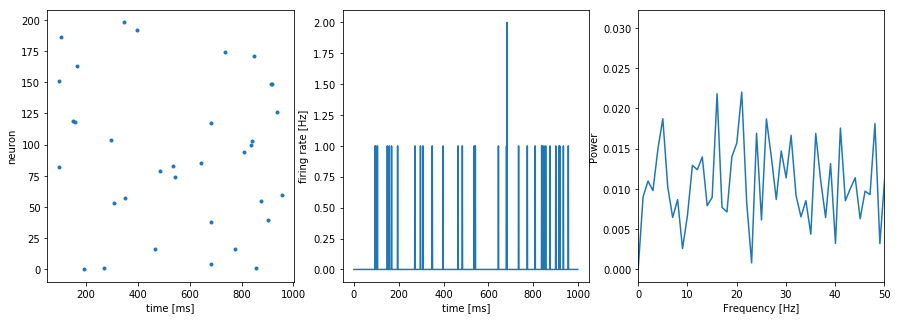

In [6]:
# consider the b factor
# Excitatory neurons                      Inhibitory neurons
Ne=200;                                   Ni=200;
re=np.random.rand(Ne);                    ri=np.random.rand(Ni); 
a=np.append(0.02*np.ones(Ne),             0.02+0.08*ri);
b=np.append(0.15*np.ones(Ne),              0.20-0.05*ri);
c=np.append(-65+15*re**2,                 -65*np.ones(Ni));
d=np.append(8-6*re**2,                    2*np.ones(Ni));
S=np.hstack([0.5*np.random.rand(Ne+Ni,Ne),-np.random.rand(Ne+Ni,Ni)]); # synaptic connection 

v=-65*np.ones(Ne+Ni)      # Initial values of v
u=b*v                     # Initial values of u
firings=np.array([])      # spike timings: [t, neuron that fire at t]

for t in range(1000):     # simulation of 1000 ms 
    I=np.append(5*np.random.randn(Ne),2*np.random.randn(Ni)) # thalamic input 
    fired=np.where(v>=30)[0] # indices of spikes
    if(fired.size>0):
        new_firings=np.hstack([np.repeat([[t]],fired.size,axis=0),np.array([fired]).T])
        firings=np.vstack([firings,new_firings]) if(firings.size>0) else new_firings
        v[fired]=c[fired]  
        u[fired]=u[fired]+d[fired]
        I=I+np.sum(S[:,fired],1)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    u=u+a*(b*v-u)   

figure(figsize=(15,5))
subplot(1,3,1); plot(firings[:,0],firings[:,1],'.');
xlabel('time [ms]'); ylabel('neuron');

rate=np.zeros(1000) # firing rate at each t
for t in range(1000):
    rate[t]=np.sum(firings[:,0]==t)

subplot(1,3,2); plot(rate); 
xlabel('time [ms]'); ylabel('firing rate [Hz]');


# Frequency analysis:
import scipy.fftpack
N=1000 # samples
Fs=1/1000 # sampling frequency (Hz)
yf=scipy.fftpack.fft(rate)
yf[0]=0; # remove the DC component
xf=np.linspace(0,1/(2*Fs),int(N/2))
subplot(1,3,3); plot(xf, 2/N*np.abs(yf[:int(N/2)])); 
xlabel('Frequency [Hz]'); ylabel('Power'); xlim([0,50]);

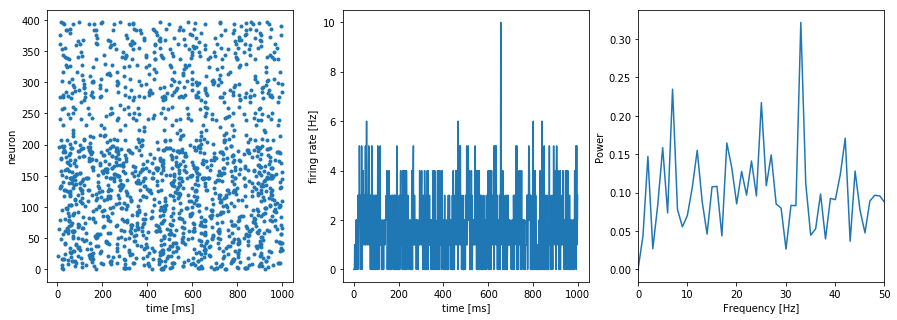

In [7]:
# consider the c factor
# Excitatory neurons                      Inhibitory neurons
Ne=200;                                   Ni=200;
re=np.random.rand(Ne);                    ri=np.random.rand(Ni); 
a=np.append(0.02*np.ones(Ne),             0.02+0.08*ri);
b=np.append(0.2*np.ones(Ne),              0.25-0.05*ri);
c=np.append(-60+15*re**2,                 -60*np.ones(Ni));
d=np.append(8-6*re**2,                    2*np.ones(Ni));
S=np.hstack([0.5*np.random.rand(Ne+Ni,Ne),-np.random.rand(Ne+Ni,Ni)]); # synaptic connection 

v=-65*np.ones(Ne+Ni)      # Initial values of v
u=b*v                     # Initial values of u
firings=np.array([])      # spike timings: [t, neuron that fire at t]

for t in range(1000):     # simulation of 1000 ms 
    I=np.append(5*np.random.randn(Ne),2*np.random.randn(Ni)) # thalamic input 
    fired=np.where(v>=30)[0] # indices of spikes
    if(fired.size>0):
        new_firings=np.hstack([np.repeat([[t]],fired.size,axis=0),np.array([fired]).T])
        firings=np.vstack([firings,new_firings]) if(firings.size>0) else new_firings
        v[fired]=c[fired]  
        u[fired]=u[fired]+d[fired]
        I=I+np.sum(S[:,fired],1)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    u=u+a*(b*v-u)   

figure(figsize=(15,5))
subplot(1,3,1); plot(firings[:,0],firings[:,1],'.');
xlabel('time [ms]'); ylabel('neuron');

rate=np.zeros(1000) # firing rate at each t
for t in range(1000):
    rate[t]=np.sum(firings[:,0]==t)

subplot(1,3,2); plot(rate); 
xlabel('time [ms]'); ylabel('firing rate [Hz]');


# Frequency analysis:
import scipy.fftpack
N=1000 # samples
Fs=1/1000 # sampling frequency (Hz)
yf=scipy.fftpack.fft(rate)
yf[0]=0; # remove the DC component
xf=np.linspace(0,1/(2*Fs),int(N/2))
subplot(1,3,3); plot(xf, 2/N*np.abs(yf[:int(N/2)])); 
xlabel('Frequency [Hz]'); ylabel('Power'); xlim([0,50]);

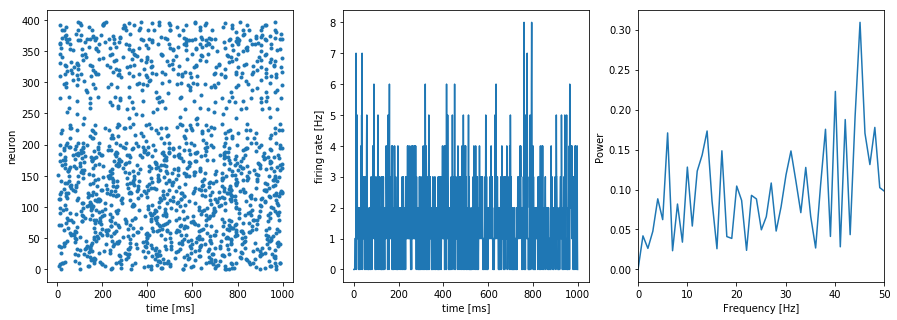

In [8]:
# consider the d factor
# Excitatory neurons                      Inhibitory neurons
Ne=200;                                   Ni=200;
re=np.random.rand(Ne);                    ri=np.random.rand(Ni); 
a=np.append(0.02*np.ones(Ne),             0.02+0.08*ri);
b=np.append(0.2*np.ones(Ne),              0.25-0.05*ri);
c=np.append(-65+15*re**2,                 -65*np.ones(Ni));
d=np.append(8-6*re**2,                    2*np.ones(Ni));
S=np.hstack([0.5*np.random.rand(Ne+Ni,Ne),-np.random.rand(Ne+Ni,Ni)]); # synaptic connection 

v=-65*np.ones(Ne+Ni)      # Initial values of v
u=b*v                     # Initial values of u
firings=np.array([])      # spike timings: [t, neuron that fire at t]

for t in range(1000):     # simulation of 1000 ms 
    I=np.append(5*np.random.randn(Ne),2*np.random.randn(Ni)) # thalamic input 
    fired=np.where(v>=30)[0] # indices of spikes
    if(fired.size>0):
        new_firings=np.hstack([np.repeat([[t]],fired.size,axis=0),np.array([fired]).T])
        firings=np.vstack([firings,new_firings]) if(firings.size>0) else new_firings
        v[fired]=c[fired]  
        u[fired]=u[fired]+d[fired]
        I=I+np.sum(S[:,fired],1)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    u=u+a*(b*v-u)   

figure(figsize=(15,5))
subplot(1,3,1); plot(firings[:,0],firings[:,1],'.');
xlabel('time [ms]'); ylabel('neuron');

rate=np.zeros(1000) # firing rate at each t
for t in range(1000):
    rate[t]=np.sum(firings[:,0]==t)

subplot(1,3,2); plot(rate); 
xlabel('time [ms]'); ylabel('firing rate [Hz]');


# Frequency analysis:
import scipy.fftpack
N=1000 # samples
Fs=1/1000 # sampling frequency (Hz)
yf=scipy.fftpack.fft(rate)
yf[0]=0; # remove the DC component
xf=np.linspace(0,1/(2*Fs),int(N/2))
subplot(1,3,3); plot(xf, 2/N*np.abs(yf[:int(N/2)])); 
xlabel('Frequency [Hz]'); ylabel('Power'); xlim([0,50]);

#### Discussion

For the variable a articulates the time scale of recovery variable u. Smaller the value of a results in slower recovery.

For the variable b articulates the sensitivity of the recovery variable u 􏰎to the subthreshold fluctuations of the membrane potential v􏰏. Greater values couple and􏰎 more strongly resulting in possible subthreshold oscillations and low-threshold spiking dynamics.

For the variable c the after-spike reset value of the membrane potential v caused by the fast high-threshold K+ 􏰚conductances.

For the d, it means after-spike reset of the recovery variable􏰎 caused by slow high-threshold and􏰚 conductances.